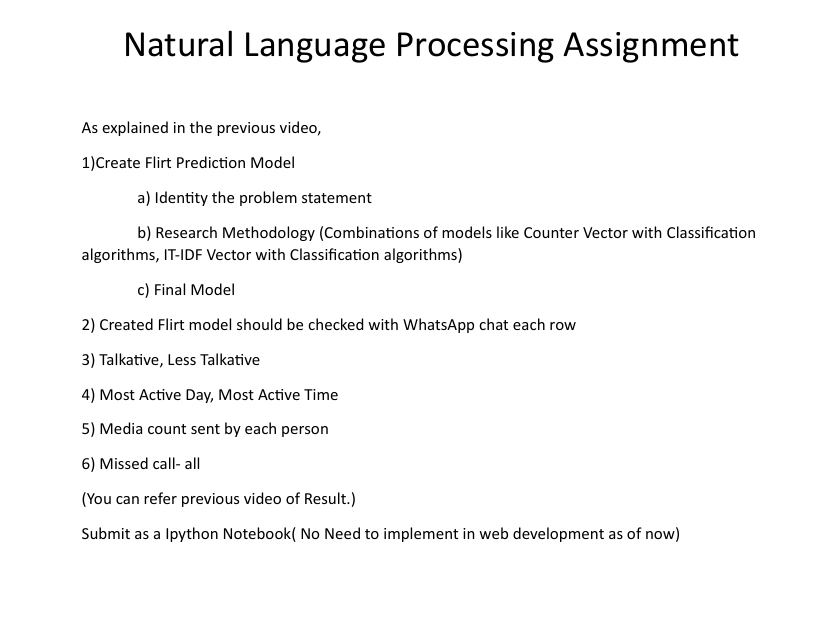

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics


In [2]:
Dataset = pd.read_csv("flirt_dataset.csv", index_col = None)

In [3]:
Dataset

,text,label
0,"Honestly, you’re unintentionally adorable 😄",flirt
1,"To be honest, talking to you is my new favouri...",flirt
2,"Honestly, talking to you is my new favourite t...",flirt
3,"You know what, I feel comfortable with you in ...",flirt
4,"You know what, talking to you is my new favour...",flirt
...,...,...
395,Hey I'll update you soon 🙂,not_flirt
396,Update: I reached home 😅,not_flirt
397,Hey I’m a little busy right now 😅,not_flirt
398,Hey share the notes when possible thanks,not_flirt


In [4]:
x = Dataset["text"]
y = Dataset["label"]

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=53, stratify=y)

## CountVectorizer and Naive Bayes

In [6]:
count_vector = CountVectorizer(stop_words = "english")
count_train = count_vector.fit_transform(x_train)
print(count_train)
count_test = count_vector.transform(x_test)

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 1208 stored elements and shape (268, 96)>
  Coords	Values
  (0, 31)	1
  (0, 68)	1
  (0, 32)	1
  (1, 36)	1
  (1, 10)	1
  (1, 52)	1
  (1, 5)	1
  (1, 13)	1
  (1, 22)	1
  (1, 29)	1
  (2, 70)	1
  (2, 88)	1
  (2, 53)	1
  (2, 90)	1
  (3, 61)	1
  (3, 46)	1
  (3, 80)	1
  (3, 57)	1
  (3, 21)	1
  (3, 84)	1
  (3, 58)	1
  (4, 88)	1
  (4, 53)	1
  (4, 90)	1
  (4, 95)	1
  :	:
  (261, 64)	1
  (261, 1)	1
  (262, 36)	1
  (262, 10)	1
  (262, 52)	1
  (262, 5)	1
  (262, 13)	1
  (262, 22)	1
  (262, 29)	1
  (263, 93)	1
  (263, 27)	1
  (264, 27)	1
  (265, 31)	1
  (265, 75)	1
  (265, 59)	1
  (265, 63)	1
  (266, 92)	1
  (266, 0)	1
  (266, 34)	1
  (267, 36)	1
  (267, 8)	1
  (267, 60)	1
  (267, 39)	1
  (267, 48)	1
  (267, 42)	1


In [7]:
len(count_vector.get_feature_names_out())

96

In [8]:
NBClassifier = MultinomialNB()
NBClassifier.fit(count_train, y_train)

NB_pred = NBClassifier.predict(count_test)
NB_score = metrics.accuracy_score(y_test, NB_pred)
print("Accuracy : ", NB_score)

NB_cm = metrics.confusion_matrix(y_test, NB_pred, labels = ["flirt", "not_flirt"])

Accuracy :  1.0


In [9]:
from sklearn.metrics import classification_report
NB_report = classification_report(y_test, NB_pred)

In [10]:
print(NB_report)

              precision    recall  f1-score   support

       flirt       1.00      1.00      1.00        66
   not_flirt       1.00      1.00      1.00        66

    accuracy                           1.00       132
   macro avg       1.00      1.00      1.00       132
weighted avg       1.00      1.00      1.00       132



## CountVector and Logistic Regression

In [11]:
LRClassifier = LogisticRegression()
LRClassifier.fit(count_train, y_train)

LR_pred = LRClassifier.predict(count_test)
LR_score = metrics.accuracy_score(y_test, LR_pred)
print("Accuracy : ", LR_score)

LR_cm = metrics.confusion_matrix(y_test, LR_pred, labels = ["flirt", "not_flirt"])

Accuracy :  1.0


In [12]:
LR_report = classification_report(y_test, LR_pred)
print(LR_report)

              precision    recall  f1-score   support

       flirt       1.00      1.00      1.00        66
   not_flirt       1.00      1.00      1.00        66

    accuracy                           1.00       132
   macro avg       1.00      1.00      1.00       132
weighted avg       1.00      1.00      1.00       132



## CountVector and KNN

In [13]:
KNClassifier = KNeighborsClassifier()
KNClassifier.fit(count_train, y_train)

KN_pred = KNClassifier.predict(count_test)
KN_score = metrics.accuracy_score(y_test, KN_pred)
print("Accuracy : ", KN_score)

KN_cm = metrics.confusion_matrix(y_test, KN_pred, labels = ["flirt", "not_flirt"])

Accuracy :  1.0


In [14]:
KN_report = classification_report(y_test, KN_pred)
print(KN_report)

              precision    recall  f1-score   support

       flirt       1.00      1.00      1.00        66
   not_flirt       1.00      1.00      1.00        66

    accuracy                           1.00       132
   macro avg       1.00      1.00      1.00       132
weighted avg       1.00      1.00      1.00       132



## TF-IDF Vectorizer and Logistic Regression

In [15]:
tfidf = TfidfVectorizer(max_df = 0.95, min_df = 2, stop_words = "english")
tfidf_train = tfidf.fit_transform(x_train)
print(tfidf_train)
tfidf_test = tfidf.transform(x_test)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 1208 stored elements and shape (268, 96)>
  Coords	Values
  (0, 31)	0.5185010218800383
  (0, 68)	0.6046307510825744
  (0, 32)	0.6046307510825744
  (1, 36)	0.30054894516845054
  (1, 10)	0.4122559639357213
  (1, 52)	0.34605226762308017
  (1, 5)	0.41957399898773123
  (1, 13)	0.41957399898773123
  (1, 22)	0.30304481178666487
  (1, 29)	0.41957399898773123
  (2, 70)	0.5199591352840335
  (2, 88)	0.49316748258398657
  (2, 53)	0.49316748258398657
  (2, 90)	0.49316748258398657
  (3, 61)	0.2926717675415614
  (3, 46)	0.3580447800004457
  (3, 80)	0.40311899192933365
  (3, 57)	0.40311899192933365
  (3, 21)	0.40311899192933365
  (3, 84)	0.40311899192933365
  (3, 58)	0.36895458444372503
  (4, 88)	0.5246942302229215
  (4, 53)	0.5246942302229215
  (4, 90)	0.5246942302229215
  (4, 95)	0.41723841423378977
  :	:
  (261, 64)	0.5137417528774477
  (261, 1)	0.5137417528774477
  (262, 36)	0.30054894516845054
  (262, 10)	0.4122559639357213
  (262, 52)

In [16]:
NBtfidf = MultinomialNB()
NBtfidf.fit(tfidf_train, y_train)

NB_pred = NBtfidf.predict(tfidf_test)
NB_score = metrics.accuracy_score(y_test, NB_pred)
print("Accuracy : ", NB_score)

NB_cm = metrics.confusion_matrix(y_test, NB_pred, labels = ["flirt", "not_flirt"])

Accuracy :  1.0


In [17]:
NB_report = classification_report(y_test, NB_pred)
print(NB_report)

              precision    recall  f1-score   support

       flirt       1.00      1.00      1.00        66
   not_flirt       1.00      1.00      1.00        66

    accuracy                           1.00       132
   macro avg       1.00      1.00      1.00       132
weighted avg       1.00      1.00      1.00       132



## TF-IDF Vecorizer and Logistic Regression

In [18]:
LRtfidf = LogisticRegression()
LRtfidf.fit(tfidf_train, y_train)

LR_pred = LRtfidf.predict(count_test)
LR_score = metrics.accuracy_score(y_test, LR_pred)
print("Accuracy : ", LR_score)

LR_cm = metrics.confusion_matrix(y_test, LR_pred, labels = ["flirt", "not_flirt"])

Accuracy :  1.0


In [19]:
LR_report = classification_report(y_test, NB_pred)
print(LR_report)

              precision    recall  f1-score   support

       flirt       1.00      1.00      1.00        66
   not_flirt       1.00      1.00      1.00        66

    accuracy                           1.00       132
   macro avg       1.00      1.00      1.00       132
weighted avg       1.00      1.00      1.00       132



## TF- IDF Vectorizer and KNN

In [20]:
KNtfidf = KNeighborsClassifier()
KNtfidf.fit(tfidf_train, y_train)

KN_pred = KNtfidf.predict(count_test)
KN_score = metrics.accuracy_score(y_test, KN_pred)
print("Accuracy : ", KN_score)

KN_cm = metrics.confusion_matrix(y_test, KN_pred, labels = ["flirt", "not_flirt"])

Accuracy :  1.0


In [21]:
KN_report = classification_report(y_test, NB_pred)
print(KN_report)

              precision    recall  f1-score   support

       flirt       1.00      1.00      1.00        66
   not_flirt       1.00      1.00      1.00        66

    accuracy                           1.00       132
   macro avg       1.00      1.00      1.00       132
weighted avg       1.00      1.00      1.00       132



In [45]:
x_test[[87]]

87    You know what, you always make my day better 😄 ✨
Name: text, dtype: object

In [46]:
NBClassifier.predict(count_test[[87]])

array(['flirt'], dtype='<U9')

## Saving the **BEST MODEL**

In [22]:
import pickle

filename = "Flirt_Prediction_Best_Model.sav"

In [24]:
pickle.dump(NBClassifier, open("Flirt_Prediction_Best_Model.sav", "wb"))

## Predicting using saved model

In [108]:
Loaded_Model = pickle.load(open("Flirt_Prediction_Best_Model.sav", "rb"))

In [109]:
Predict = Loaded_Model.predict(count_test[[87]])

In [110]:
Predict

array(['flirt'], dtype='<U9')